<div class="alert alert-block alert-warning">

## Reading many files at once
#### The challenge is that you have many files, with the same format, to load into your notebook and you want to append the files together into one dataframe.

#### In this example, we will read in each csv file and use part of the name to populate a column in the dataframe to differentiate the files.
    
</div>

In [ ]:
# ----------------------------------------------------------
# Dr. Sharon Dill
# May 2022
# ---------------------------------------------------------

This data is a subset of data collected from Facebook ads data that can be found at: https://www.facebook.com/ads/library/report/?source=nav-header

This code will show:
- Use glob to read in each csv file which contains data for one state. 
- Append the data together. 
- Use the state name from the name of the csv file to populate a State column in the dataframe.

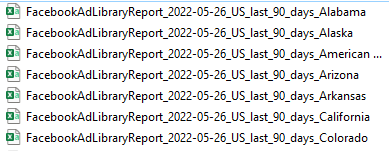

In [1]:
# import libraries
import pandas as pd
import glob

In [2]:
# use glob to read in all csv in current directory
filenames = glob.glob('*.csv')

filenames

['FacebookAdLibraryReport_2022-05-26_US_last_90_days_Alabama.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_Alaska.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_American Samoa.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_Arizona.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_Arkansas.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_California.csv',
 'FacebookAdLibraryReport_2022-05-26_US_last_90_days_Colorado.csv']

In [3]:
# initialize dataframe
df = pd.DataFrame()

# loop through files
for x in filenames:
    filename = pd.read_csv(x)
    print(x)
    st = x.split('_')[6] #uses last position after underscore
    st = st.split('.')[0] #st object contains Alabama.csv - only need the state
    filename['State'] = st
    print(st)
    df = df.append(filename)

df = df.reset_index() 
df.info()

FacebookAdLibraryReport_2022-05-26_US_last_90_days_Alabama.csv
Alabama
FacebookAdLibraryReport_2022-05-26_US_last_90_days_Alaska.csv
Alaska
FacebookAdLibraryReport_2022-05-26_US_last_90_days_American Samoa.csv
American Samoa
FacebookAdLibraryReport_2022-05-26_US_last_90_days_Arizona.csv
Arizona
FacebookAdLibraryReport_2022-05-26_US_last_90_days_Arkansas.csv
Arkansas
FacebookAdLibraryReport_2022-05-26_US_last_90_days_California.csv
California
FacebookAdLibraryReport_2022-05-26_US_last_90_days_Colorado.csv
Colorado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73582 entries, 0 to 73581
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               73582 non-null  int64 
 1   Page ID             73582 non-null  int64 
 2   Page name           73582 non-null  object
 3   Disclaimer          73582 non-null  object
 4   Amount spent (USD)  73582 non-null  object
 5   State               73582 non-nu

In [4]:
# shorten column name
df = df.rename(columns = {'Amount spent (USD)': 'Amount'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73582 entries, 0 to 73581
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       73582 non-null  int64 
 1   Page ID     73582 non-null  int64 
 2   Page name   73582 non-null  object
 3   Disclaimer  73582 non-null  object
 4   Amount      73582 non-null  object
 5   State       73582 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


### Seven files read in - all data appended

In [5]:
# check by state
df['State'].value_counts()

California        15892
Arizona           12719
Alabama           12200
Colorado          12086
Arkansas          11374
Alaska             9217
American Samoa       94
Name: State, dtype: int64

In [6]:
# check data
df.head()

,index,Page ID,Page name,Disclaimer,Amount,State
0,0,109418838263843,Lew Burdette for Governor,LEWin22 For Governor,74666,Alabama
1,1,101828156534504,He Gets Us,He Gets Us LLC,48549,Alabama
2,2,945443118979935,Safe Surgery Coalition,Safe Surgery Coalition,46837,Alabama
3,3,111687831420243,Brian Christine for State Senate,Christine For Senate,44316,Alabama
4,4,106057494680860,Greg Cook for Supreme Court,Greg Cook for Alabama Supreme Court,40192,Alabama


In [7]:
# can write out file for later use
df.to_csv('facebook_may2022_final.csv', header = True, index = False)